In [1]:
import pandas, warnings, datetime

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
urlfile = "online_retail.csv"

origin = pandas.read_table(urlfile, parse_dates=["Date"], sep=",")

origin.iloc[:5, :5]

,Invoice,Stock,Description,Quantity,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00


In [3]:
origin.iloc[:5, 5:]

,Price,Customer,Country
0,6.95,13085.0,United Kingdom
1,6.75,13085.0,United Kingdom
2,6.75,13085.0,United Kingdom
3,2.10,13085.0,United Kingdom
4,1.25,13085.0,United Kingdom


In [4]:
origin.isnull().sum().sum()

0

In [5]:
origin["Quantity"].min(), origin["Price"].min()

(1, 0.0)

In [6]:
origin = origin[(origin["Quantity"] > 0) & (origin["Price"] > 0)]

origin["Quantity"].min(), origin["Price"].min()

(1, 0.001)

In [7]:
origin["Total"] = origin["Quantity"] * origin["Price"]

origin.iloc[:5, 5:]

,Price,Customer,Country,Total
0,6.95,13085.0,United Kingdom,83.4
1,6.75,13085.0,United Kingdom,81.0
2,6.75,13085.0,United Kingdom,81.0
3,2.10,13085.0,United Kingdom,100.8
4,1.25,13085.0,United Kingdom,30.0


In [8]:
custjoin = origin.groupby("Customer")["Date"].min()

tahun = custjoin.dt.year

ratori = tahun.value_counts().sort_index()

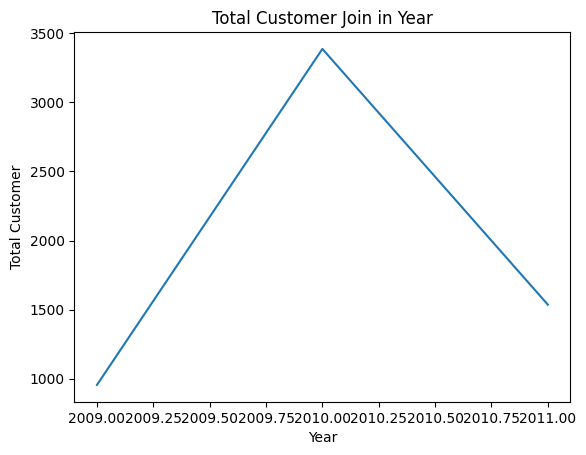

In [9]:
title = "Total Customer Join in Year"

ratori.plot.line(title=title, xlabel="Year", ylabel="Total Customer");

In [10]:
import datetime

def YearlyMonthly(tanggal, timer):
  if timer == "Monthly":
    return datetime.datetime(tanggal.year, tanggal.month, 1)
  elif timer == "Yearly":
    return datetime.datetime(tanggal.year, 1, 1)
  else:
    raise ValueError("Only Support Monthly, Yearly")

# yearly = lambda i: YearlyMonthly(i, timer="Monthly")

In [11]:
Yearly = lambda i : YearlyMonthly(i, "Monthly")

origin["InvoiceMonth"] = origin["Date"].apply(Yearly)

origin.iloc[:5, 5:]

,Price,Customer,Country,Total,InvoiceMonth
0,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,6.75,13085.0,United Kingdom,81.0,2009-12-01
2,6.75,13085.0,United Kingdom,81.0,2009-12-01
3,2.10,13085.0,United Kingdom,100.8,2009-12-01
4,1.25,13085.0,United Kingdom,30.0,2009-12-01


In [12]:
origin["CohortMonth"] = origin.groupby("Customer")["InvoiceMonth"].transform("min")

origin.iloc[:5, 5:]

,Price,Customer,Country,Total,InvoiceMonth,CohortMonth
0,6.95,13085.0,United Kingdom,83.4,2009-12-01,2009-12-01
1,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01
2,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01
3,2.10,13085.0,United Kingdom,100.8,2009-12-01,2009-12-01
4,1.25,13085.0,United Kingdom,30.0,2009-12-01,2009-12-01


In [13]:
yearbulan = lambda i : (i.dt.year, i.dt.month)

invoice_year, invoice_month = yearbulan(origin["InvoiceMonth"])

cohort_year, cohort_month = yearbulan(origin["CohortMonth"])

yearly_diff = invoice_year - cohort_year

monthly_diff = invoice_month - cohort_month

origin["Cohort"] = yearly_diff * 12 + monthly_diff + 1

origin.iloc[:5, 5:]

,Price,Customer,Country,Total,InvoiceMonth,CohortMonth,Cohort
0,6.95,13085.0,United Kingdom,83.4,2009-12-01,2009-12-01,1
1,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01,1
2,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01,1
3,2.10,13085.0,United Kingdom,100.8,2009-12-01,2009-12-01,1
4,1.25,13085.0,United Kingdom,30.0,2009-12-01,2009-12-01,1


In [14]:
origin["Cohort"].nunique()

25